### Analysis software development 

Goal: establish smooth reading of the binary DAQ datafiles

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
from scipy.stats import norm

import numpy as np
# import data handling class
from DT5550 import *

Open a datafile and read the data

In [2]:
#
# open the datfile / data directory
#
    
io = DT5550(indir='../../data/20220104_154421/')

#
# loop over all the events
#
Etot = []

for file in io.filenames:
    io.open_data(file)
    while io.read_event() == 0:
        #
        # data: io.Q[0:ndet-1] -> energy
        #       io.ph[0:ndet-1] -> peak height
        #       io.t[0:ndet-1] -> time without timewalk correction
        #       io.tc[0:ndet-1] -> time with timewalk correction
        #       io.valid[0:ndet-1] -> valid bit = 1 for valid data
        
        # for example measure the total measured energy
        Etot.append(io.Q.sum())


print('Processing done')

Etot = np.array(Etot)

DT5550:: Data recorded with config:  ../../data/20220104_154421\config_20220104_154421.json
DT5550:: Open data file: ../../data/20220104_154421\data_20220104_154421_0.raw
DT5550:: Open data file: ../../data/20220104_154421\data_20220104_154421_1.raw
DT5550:: Open data file: ../../data/20220104_154421\data_20220104_154421_2.raw
Processing done


A few basic plots: integrated charge and time

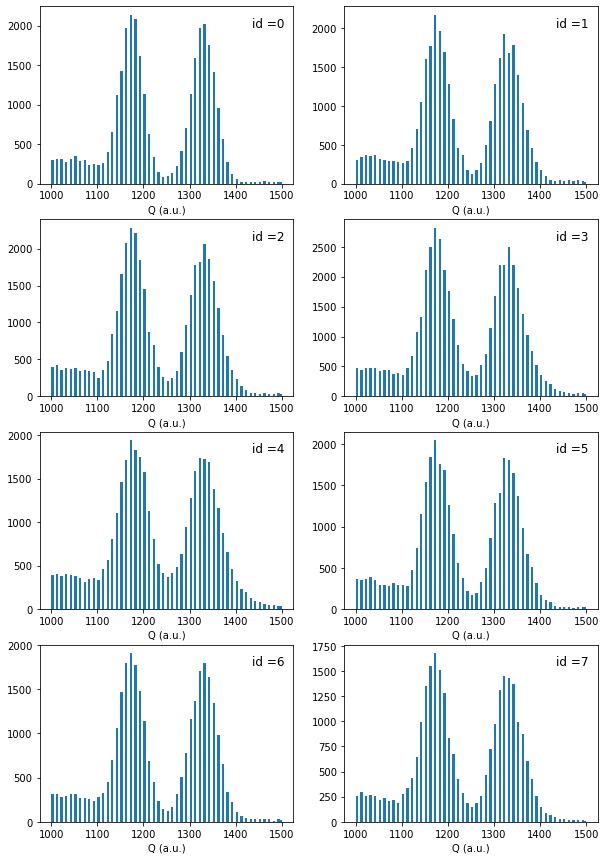

In [6]:
io.plot_all(type="charge",bins=100,logy=False, range=(1000,1500))

In [4]:
# io.plot_all(type="time",range=(0,250),bins=100,logy=True)

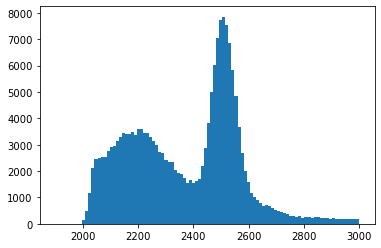

In [7]:
h = plt.hist(Etot,bins=100,range=(1900,3000))